# Telecom prepaid plan analytics

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

# Objectives

The objective of this project is to:
- Analyze clients' behavior and determine which prepaid plans brings in more revenue
- Use analytics to assists the comercial department in making adjustment in advertising budget
- Apply Statistical Data Analysis to a real-life analytical case study.

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#data_preparation">Prepare the data</a></li>
        <li><a href="#analyze_data">Analyze the data</a></li>
        <li><a href="#test_hypothesis">Test the hypothesis</a></li>
        <li><a href="#overall_conclusion">Overall conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and study the general information</h2> 
</div>

We require the following libraries: *numpy* and *pandas* for data preprocessing and manipulation, *matplotlib* and *seaborn* for visualization, *math* for factorial calculation, *scipy* for statistical analysis.

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns

# import the math and scipy packages for statistical analysis
import math as mt
from math import factorial
from scipy import stats as st

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [2]:
# read the data
try:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_users1.csv')
    calls = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_calls.csv')
    messages = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_messages.csv')
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_internet.csv')
    plans = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_plans.csv')
except:
    users = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_users1.csv')
    calls = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_calls.csv')
    messages = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_messages.csv')
    internet = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_internet.csv')
    plans = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Statistical Data Analysis/Data/megaline_plans.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [3]:
# study the general information about the dataset
df_name = ['calls', 'users', 'messages', 'internet', 'plans']
df_head = [calls, users, messages, internet, plans]

for name, top_5_df in zip(df_name, df_head):
    # use the head() method to view the first 10 rows
    print('------------------------------------------------------------------------------')
    print('The head of the {} dataframe is:'.format(name)) 
    print(top_5_df.head())
    print()
    # check the structure of our dataset
    print('The structure of the {} dataframe is:'.format(name))
    top_5_df.info()
    print()
    # check shape of our dataframe
    print('The shape of our data is', top_5_df.shape, 'with {} rows and {} columns'.format(top_5_df.shape[0], top_5_df.shape[1]))
    print()

------------------------------------------------------------------------------
The head of the calls dataframe is:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

The structure of the calls dataframe is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

The shape of our data is (137735, 4) with 137735 rows and 4 columns

------------------------------------------------------------------------------
The head of the us

### Conclusion

From the general information about the dataset, we can see that the dataset contains different data with different datatype. One of the problems identified while looking through the data is that some columns have the wrong datatype. We would need to change datatypes to the right format. For instance, *call_date* in the `calls` dataframe needs to be changed to datetime, *reg_date* and *churn_date* in the `users` need to be changed to datetime, *message_date* in the `messages` needs to be changed to datetime, *session_date* in the `internet` needs to be changed to datetime. We would also need to check for missing values, carry out some data preprocessing, and data type replacement. 

<div id="data_preparation">
    <h2>Prepare the data</h2> 
</div>

#### Convert data to the necessary types

In [4]:
# check for null values
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

First, we check for null values. We can see that there is no null values in the `calls` dataframe. We proceed to convert datatypes in the `calls` dataframe. By inspecting the `calls` data, we identified another problem with the data. Some data in the `duration` column has values greater than 0 but less than 1 minutes. For such values, we would be rounding up `duration` less than 1 minutes to 1 minutes.

In [5]:
# change the `calls_date` to datetime datatype
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [6]:
# check and convert call duration that lasted 1 sec to 1 minutes
calls.loc[calls['duration'] <= 1, 'duration'] = 1

# rename columns
calls.columns = ['id', 'user', 'call date', 'duration']
calls.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user       137735 non-null  int64         
 2   call date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


We look at the `user` dataframe by checking for null values and change datatype in this dataframe. Another error we noticed is in the `churn_date` column where 466 values is missing. This large portion of missing values in the `churn_date` field will be transformed into either churn ='Yes' or no churn = 'No', thus it can be analyzed as a categorcal variable.

In [7]:
# check for null values
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
tariff          0
churn_date    466
dtype: int64

In [8]:
# change the `reg_date` in the `users` to datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

# change the `churn date` to datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
users.columns = ['user', 'first name', 'last name', 'age', 'city', 'subscription date', 'plan', 'churn date']

In [9]:
# create categorical variable for whether customer churn or not
users['customer churn'] = np.where(users['churn date'].isnull(), 'No', 'Yes')
users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user               500 non-null    int64         
 1   first name         500 non-null    object        
 2   last name          500 non-null    object        
 3   age                500 non-null    int64         
 4   city               500 non-null    object        
 5   subscription date  500 non-null    datetime64[ns]
 6   plan               500 non-null    object        
 7   churn date         34 non-null     datetime64[ns]
 8   customer churn     500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


We look at the `messages`, `internet` and `plans`. We need to change datatype to datetime, and rename the columns.

In [10]:
# change the `message_date` in the `messages` to datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
messages.columns = ['id', 'user', 'message date']
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user          76051 non-null  int64         
 2   message date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
# change the `session_date` in `internet` to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
internet = internet.loc[internet['mb_used'] != 0] # drop `mb_used` less than 0
internet = internet.reset_index(drop=True, inplace=False)
internet.columns = ['id', 'user', 'session date', 'data used'] # rename columns
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91078 entries, 0 to 91077
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user          91078 non-null  int64         
 2   session date  91078 non-null  datetime64[ns]
 3   data used     91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.8+ MB


In [12]:
# rename `plans` columns
plans.columns = ['messages included', 'data volume per month', 'minutes included', 'monthly fee', 'price per gb', 'price per message', 'price per minute', 'plan']
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages included      2 non-null      int64  
 1   data volume per month  2 non-null      int64  
 2   minutes included       2 non-null      int64  
 3   monthly fee            2 non-null      int64  
 4   price per gb           2 non-null      int64  
 5   price per message      2 non-null      float64
 6   price per minute       2 non-null      float64
 7   plan                   2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


#### Conclusion

We identified the problem with the datatype in earlier section. In this section, we fixed some of the problems identifies. One of the problems identified in the dataset is that the *subscription date*, *churn date* in the `users` dataframe, *call date* in the `calls` dataframe, *message date* in the `messages` dataframe, and *session date* in the `internet` dataframe are of datatype object. We converted this datatype to datetime datatype. We also rounded up individual calls for call durations less than 1 minutes as one minute. In addition, we created a new column in the `users` dataframe to show whether a customer churn or not. In the `internet` dataframe, 13,747 rows of data with 0 *data used (mb_used)* were filtered.

#### Make calculations

In [13]:
# add new features to table
calls['month'] = calls['call date'].dt.month # create `month` call was placed
internet['month'] = internet['session date'].dt.month # create session `month` 
messages['month'] = messages['message date'].dt.month # create `month` messages were sent

In [14]:
# number of calls made and minutes used per month
calls_per_month = (calls
                   .pivot_table(index='user', values='duration', aggfunc=['count', 'sum']).reset_index())
calls_per_month.columns = ['user', 'number of calls', 'total minutes used']
calls_per_month.head()

,user,number of calls,total minutes used
0,1000,16,116.83
1,1001,261,1702.19
2,1002,113,797.74
3,1003,149,1073.39
4,1004,370,2688.68


In [15]:
# summary of calls made and minutes used per month
calls_per_month.describe()

,user,number of calls,total minutes used
count,481.000000,481.000000,481.000000
mean,1250.636175,286.351351,1993.376029
std,144.955118,238.182107,1660.736804
min,1000.000000,2.000000,5.600000
25%,1125.000000,108.000000,773.400000
50%,1251.000000,216.000000,1496.780000
75%,1376.000000,413.000000,2814.250000
max,1499.000000,1300.000000,9214.400000


From the number of calls made per month, we can see that about 481 users made calls out of 500 users. It is reasonable to assume that 19 users did not make any call. The person with the highest call rate made 1300 calls while the person with the lowest call rate made just 2 calls. Since the mean is *greater* than the median, we expect the distribution to be skewed to the right. This means the data could contain outliers.

In [16]:
# number of text messages sent per month
text_per_month = (messages
                   .pivot_table(index='user', values='month', aggfunc='count').reset_index())
text_per_month.columns = ['user', 'messages sent']
text_per_month.head()

,user,messages sent
0,1000,11
1,1001,207
2,1002,88
3,1003,50
4,1004,177


In [17]:
# summary of messages sent per month
text_per_month.describe()

,user,messages sent
count,402.000000,402.000000
mean,1248.639303,189.181592
std,143.678749,192.207920
min,1000.000000,1.000000
25%,1124.250000,60.000000
50%,1247.500000,126.500000
75%,1372.750000,258.750000
max,1497.000000,1288.000000


On the average, about 189 messages was sent per user per month. The least number of message sent was 1 while the most message sent was 1288. Since the mean is *greater* than the median, we expect the distribution to be skewed to the right. This means the data could contain outliers. 

In [18]:
# volume of data per month
volume_per_month = (internet
                    .pivot_table(index='user', values='data used', aggfunc='sum').reset_index())
volume_per_month.columns = ['user', 'data volume'] 
volume_per_month.head()

,user,data volume
0,1000,1901.47
1,1001,80437.94
2,1002,40293.33
3,1003,27044.14
4,1004,156352.81


In [19]:
# summary of volume of data per month per user
volume_per_month.describe()

,user,data volume
count,489.000000,489.000000
mean,1248.464213,78610.968732
std,144.361253,61940.374028
min,1000.000000,92.680000
25%,1123.000000,29401.530000
50%,1247.000000,62354.370000
75%,1373.000000,115737.760000
max,1499.000000,390159.350000


From the volume of data used per month, we can see that about 489 users used data out of 500 users. It is reasonable to assume that 11 users did not use data in a month. On the average, about 78,601MB of data was used per month. The person with the lowest data volume used $\approx$93MB while the person with the most data usage used $\approx$390,159MB of data. Since the mean is *greater* than the median, we would expect the distribution to be skewed to the right. This means that the data could contain outliers. 

We proceed to join the calculated values to obtain a new dataset.

In [20]:
# plans for each user
user_plans = users[['user', 'city', 'plan']]
user_plans.head()

,user,city,plan
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,"Tulsa, OK MSA",surf
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [21]:
# join tables to gether using `merge()`
first_join = pd.merge(calls_per_month, text_per_month, on='user', how='inner')
second_join = pd.merge(first_join, volume_per_month, on='user', how='inner')
all_join = pd.merge(second_join, user_plans, on='user')
all_join.head()

,user,number of calls,total minutes used,messages sent,data volume,city,plan
0,1000,16,116.83,11,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,261,1702.19,207,80437.94,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,113,797.74,88,40293.33,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,149,1073.39,50,27044.14,"Tulsa, OK MSA",surf
4,1004,370,2688.68,177,156352.81,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [22]:
data = all_join[['user', 'number of calls', 'total minutes used', 'messages sent', 'data volume', 'plan']]
data.head()

,user,number of calls,total minutes used,messages sent,data volume,plan
0,1000,16,116.83,11,1901.47,ultimate
1,1001,261,1702.19,207,80437.94,surf
2,1002,113,797.74,88,40293.33,surf
3,1003,149,1073.39,50,27044.14,surf
4,1004,370,2688.68,177,156352.81,surf


We have been able to aggregate our data. We now have the number of calls per month, total minutes used per month, messages sent per month, volume of data per month, monthly plan, and volume of data in gigabytes. Now we have to calculate the monthly revenue from each user.

In [23]:
# function to calculate if a user is over their plan usage
def fill_na(df):
    if df.isna().sum().sum() !=0:
        df.fillna(0,inplace=True)
    return df

def calculate_overage(df, df_plan):   
    over_minutes = []
    over_messages = []
    over_data_volume = []
    
    # ultimate allowances
    ultimate_monthly_messages = 1000 
    ultimate_monthly_data = 30720 
    ultimate_monthly_minutes = 3000 
    
    # surf allowances
    surf_monthly_messages = 50   
    surf_monthly_data = 15360  
    surf_monthly_minutes = 500 
    duration= 0
    mb_used = 0
    total_messages = 0
    plan = 0
    
    # Create a tuple of every row
    for duration, mb_used, total_messages, plan in zip(df['total minutes used'], df['data volume'], df['messages sent'], df['plan']):
        if plan == 'ultimate':
            if duration <= ultimate_monthly_minutes:
                over_minutes.append(0)
            else:
                over_minutes.append(duration - ultimate_monthly_minutes)
                
            if mb_used <= ultimate_monthly_data:
                over_data_volume.append(0)
            else:
                over_data_volume.append(mb_used - ultimate_monthly_data)
                
            if total_messages <= ultimate_monthly_messages:
                over_messages.append(0)
            else:
                over_messages.append(total_messages - ultimate_monthly_messages)
                
        else: # surf case 
            if duration <= surf_monthly_minutes:
                over_minutes.append(0)
            else:
                over_minutes.append(duration - surf_monthly_minutes)
                
            if mb_used <= surf_monthly_data:
                over_data_volume.append(0)
            else:
                over_data_volume.append(mb_used - surf_monthly_data)
                
            if total_messages <= surf_monthly_messages:
                over_messages.append(0)
            else:
                over_messages.append(total_messages - surf_monthly_messages)
    
    return np.ceil(over_minutes), np.ceil(over_data_volume), np.ceil(over_messages)
data['over_minutes'], data['over_data_volume'], data['over_messages'] = calculate_overage(data, plans)

In [24]:
# function to calculate revenue
def calc_revenue(df, df_plan):
    
    revenue = []
    user_sum = 0
 
    # ultimate allowance and charge
    ultimate_monthly_charge = 70 
    ultimate_exceed_message_charge = 0.01 
    ultimate_exceed_data_charge = 7 
    ultimate_exceed_minute_charge = 0.01 
    
    # surf allowance and charge
    surf_monthly_charge = 20 
    surf_exceed_message_charge = 0.03 
    surf_exceed_data_charge = 10 
    surf_exceed_minute_charge = 0.03 
    
    for over_minutes, over_data_volume, over_messages, plan in zip(df['over_minutes'], df['over_data_volume'], df['over_messages'], df['plan']):
        if plan == 'ultimate':
            user_sum += ultimate_monthly_charge
            user_sum += ultimate_exceed_message_charge * over_messages
            user_sum += ultimate_exceed_data_charge * (over_data_volume / 1024)
            user_sum += ultimate_exceed_minute_charge * over_minutes
        else:
            user_sum += surf_monthly_charge
            user_sum += surf_exceed_message_charge * over_messages
            user_sum += surf_exceed_data_charge * (over_data_volume / 1024)
            user_sum += surf_exceed_minute_charge * over_minutes
        revenue.append(user_sum)
        user_sum = 0
    return revenue

In [25]:
# calculate revenue and determine mean of revenue
data['revenue'] = calc_revenue(data, plans)
data.columns = ['user', 'number of calls', 'total minutes used', 'messages sent', 'data volume', 'plan', 'over minutes', 'over data volume', 'over messages', 'revenue']
display(data.head(10))
print('The mean of the revenue is: {:.2f}'.format(data['revenue'].mean()))

,user,number of calls,total minutes used,messages sent,data volume,plan,over minutes,over data volume,over messages,revenue
0,1000,16,116.83,11,1901.47,ultimate,0.0,0.0,0.0,70.000000
1,1001,261,1702.19,207,80437.94,surf,1203.0,65078.0,157.0,696.327344
2,1002,113,797.74,88,40293.33,surf,298.0,24934.0,38.0,273.576094
3,1003,149,1073.39,50,27044.14,surf,574.0,11685.0,0.0,151.331328
4,1004,370,2688.68,177,156352.81,surf,2189.0,140993.0,127.0,1466.364766
5,1005,59,480.00,11,17140.17,surf,0.0,1781.0,0.0,37.392578
6,1006,11,66.11,154,34187.19,ultimate,0.0,3468.0,0.0,93.707031
7,1007,380,2566.57,255,143852.74,surf,2067.0,128493.0,205.0,1342.974453
8,1008,219,1527.11,84,55473.04,ultimate,0.0,24754.0,0.0,239.216797
9,1011,413,2845.76,371,131778.60,ultimate,0.0,101059.0,0.0,760.833008


The mean of the revenue is: 580.32


#### Conclusion

At the end of this section, we have been able to prepare the data for analysis by first converting to the appropriate datatypes. We also found some errors in the data which was handled. One of the errors observed was that some data in the `duration` column has values greater than 0 but less than 1 minutes. For such values, we rounded up duration less than 1 minutes to 1 minutes. We transformed the large portion of missing values in the `churn_date` field into either churn ='Yes' or no churn = 'No', thus it can be analyzed as a categorcal variable. We made some calculations and determined that 481 users made calls, 189 messages were sent per user per month, 78,601 MB of data was used on the average per month. We observe that the *mean* of the data is greater than the *median* so we expect the distribution to be skewed to the right and the data will contain outliers which we will deal with in later section. We joined the data and calculated if a user is over their plan, and computed the revenue. We determined the average revenue to be $580.32.

<div id="analyze_data">
    <h2>Analyze the data</h2> 
</div>

#### Carry out Exploratory Data Analysis

We begin by carrying out exploratory data analysis to describe the distribution of our data. 

In [26]:
# populate the list of numeric and categorical attributes
num_list = []
cat_list = []
plot_data = data[['number of calls', 'total minutes used', 'messages sent', 'data volume', 'plan', 'over minutes', 'over data volume', 'over messages', 'revenue']]

for column in plot_data:
    if is_numeric_dtype(plot_data[column]):
        num_list.append(column)
    elif is_string_dtype(plot_data[column]):
        cat_list.append(column)
        
print(num_list)
print(cat_list)

['number of calls', 'total minutes used', 'messages sent', 'data volume', 'over minutes', 'over data volume', 'over messages', 'revenue']
['plan']


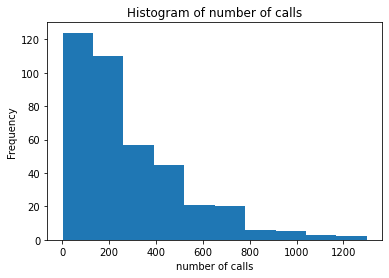

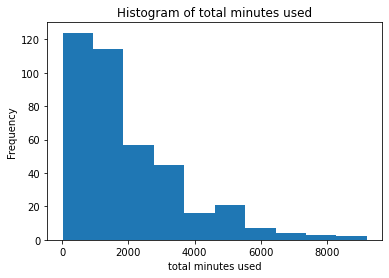

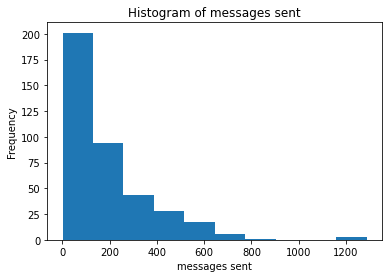

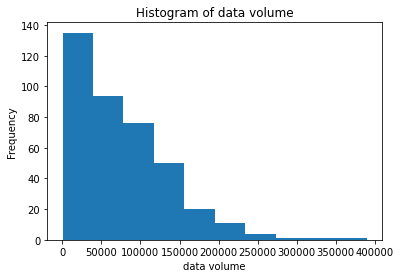

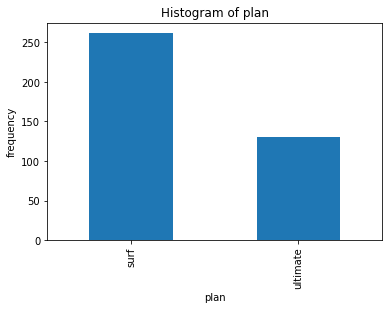

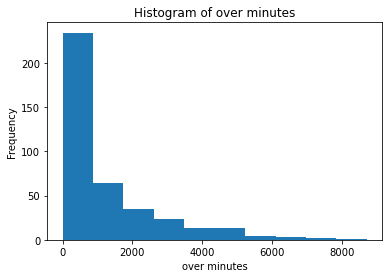

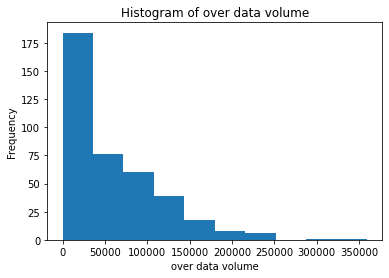

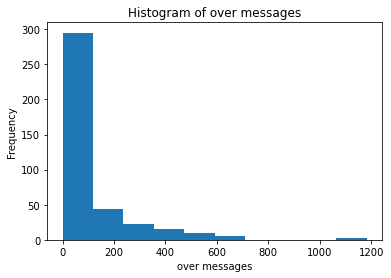

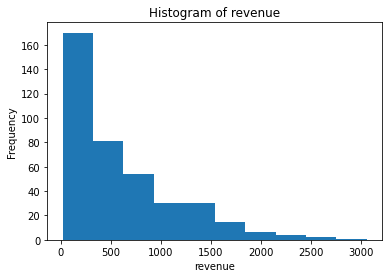

In [27]:
# create histogram and bar chart
for column in plot_data:
    plt.figure(column)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.title('Histogram of ' + column)
    if is_numeric_dtype(plot_data[column]):
        data[column].plot(kind = 'hist')
    elif is_string_dtype(plot_data[column]):
        data[column].value_counts().plot(kind = 'bar')

#### Conclusion

We used a for loop to iterate through the columns in the data frame and create a plot for each column. We use a histogram to plot numerical variables and a bar plot for categorical variables. The plot above shows the frequency distribution of the features in our data. All the charts above with the exception of the `histogram of plan` show that the distribution is **skewed right**. In the histogram of number of calls, most number of calls is between 2 and 1300. Since the *mean* is greater than the *median*, we can conclude that the data has some outliers. The minimum total minutes used is 6 and the maximum is 9214 with a *standard deviation* of 1676. This shows that we have outlier in this column since the *mean* at 1950 is greater than the *median* at 1454. The histogram of messages sent shows that most messages was between 1 and 600 with some outlier at 1200 messages. The bar plot for the plan shows that surf had the most frequency than ultimate. This means more people used the surf plan than the ultimate plan. We need to further analyze the data to determine which plan brings in more revenue. Since the data is skewed, we would have to detect and remove outliers in the data.

#### Outlier detection and removal

We will determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data. 

In [28]:
# upper limit of the outliers
telecom = data[['number of calls', 'total minutes used', 'messages sent', 'data volume', 'revenue']]
iqr = telecom.quantile(0.75) - telecom.quantile(0.25)
telecom_outliers_upper = telecom.quantile(0.75) + iqr*1.5
telecom_outliers_lower = telecom.quantile(0.25) - iqr*1.5
print('The inter-quartile range are - number of calls: {}, total minutes used: {:.2f}, messages sent: {},  data volume: {:.2f}, and revenue: {:.2f}'.format(*iqr))
print()
print('The upper bound are - number of calls: {}, total minutes used: {:.2f}, messages sent: {:.2f},  data volume: {:.2f}, and revenue: {:.2f}'.format(*telecom_outliers_upper))
print()
print('The lower bound are - number of calls: {}, total minutes used: {:.2f}, messages sent: {:.2f},  data volume: {:.2f}, and revenue: {:.2f}'.format(*telecom_outliers_lower))

The inter-quartile range are - number of calls: 293.0, total minutes used: 2055.32, messages sent: 195.0,  data volume: 82911.08, and revenue: 779.47

The upper bound are - number of calls: 837.5, total minutes used: 5833.15, messages sent: 547.50,  data volume: 235581.80, and revenue: 2054.96

The lower bound are - number of calls: -334.5, total minutes used: -2388.13, messages sent: -232.50,  data volume: -96062.52, and revenue: -1062.91


In [29]:
# import stats from scipy
from scipy import stats

# z-score for 'number of calls', 'total minutes used', 'messages sent', 'data volume', 'revenue'
stats.zscore(telecom)

array([[-1.10117894, -1.09566082, -0.93381386, -1.22897812, -0.91453296],
       [-0.08042229, -0.14856229,  0.10447899,  0.07630473,  0.20789881],
       [-0.69704264, -0.68888327, -0.5259131 , -0.59090213, -0.54970732],
       ...,
       [ 0.58202795,  0.49038393, -0.07033562,  0.25831544,  0.45526588],
       [-0.35540163, -0.31974806, -0.64775358, -0.19243042, -0.09813623],
       [-0.9428575 , -0.99110338, -0.72721477, -1.07598891, -0.91453296]])

In [30]:
# filtered dataset
telecom_filtered = telecom[(np.abs(stats.zscore(telecom)) < 3).all(axis=1)]
telecom_filtered = telecom_filtered.reset_index(drop=True, inplace=False)
telecom_filtered

,number of calls,total minutes used,messages sent,data volume,revenue
0,16,116.83,11,1901.47,70.000000
1,261,1702.19,207,80437.94,696.327344
2,113,797.74,88,40293.33,273.576094
3,149,1073.39,50,27044.14,151.331328
4,370,2688.68,177,156352.81,1466.364766
...,...,...,...,...,...
371,462,3431.59,409,63050.67,584.462422
372,164,1039.23,108,40823.96,286.611875
373,420,2771.73,174,91389.19,834.360469
374,195,1415.64,65,64268.64,525.556953


In [31]:
# describe the filtered data
telecom_filtered.describe()

,number of calls,total minutes used,messages sent,data volume,revenue
count,376.000000,376.000000,376.000000,376.000000,376.000000
mean,253.343085,1763.232101,170.178191,69565.841968,522.997914
std,198.535429,1386.669411,156.092187,50873.131572,479.430159
min,2.000000,6.150000,1.000000,92.680000,20.000000
25%,99.500000,665.067500,56.750000,25001.032500,92.968965
50%,200.000000,1404.100000,120.000000,57390.460000,402.323437
75%,370.250000,2561.950000,243.250000,104560.592500,816.532070
max,945.000000,6454.380000,740.000000,226437.930000,2004.560234


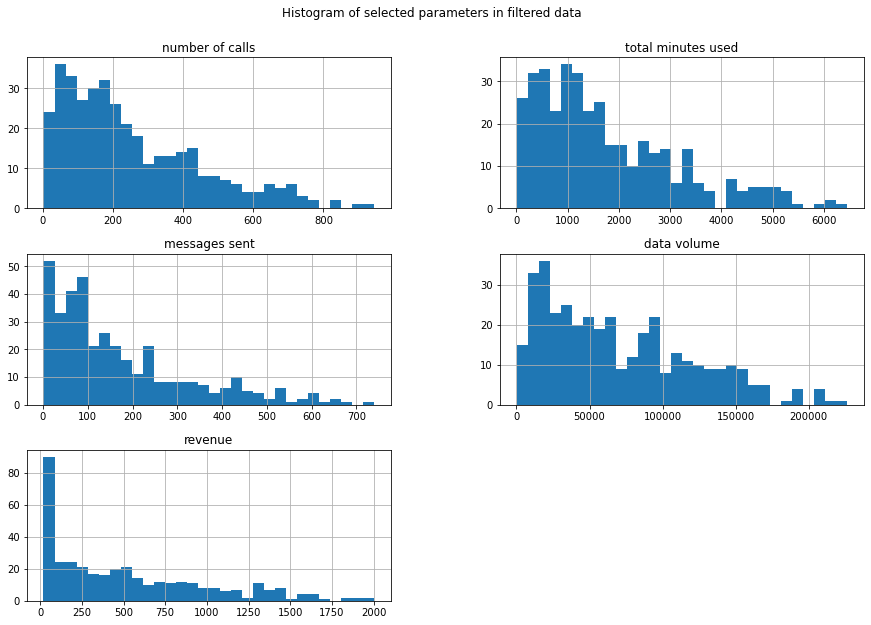

In [32]:
# plot histogram of filtered data
telecom_filtered[['number of calls', 'total minutes used', 'messages sent', 'data volume', 'revenue']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of selected parameters in filtered data', y=0.95);

Before removing outliers, we had high values in the histogram of the data. After removing outliers using the Z-score technique, we observe from the histogram that the mean is closer to the median, and the distribution of the data is closer to a normal distribution than before.

#### Conclusion

We detected outlier in the data from the initial histogram plotted. We use the `stats` package in scipy to determine the Z-score and filter the data to obtain the distribution where the mean is 0 and the standard deviation is 1. We have successfully removed outliers from the data. By looking at the statistics of the filtered data, we can see that outliers have been removed. For instance, the maximum number of calls is 945 against 1300 in the initial dataset. 

#### Describe the customers' behavior

In [33]:
# extract filtered data for the ultimate plan
ultimate_data = data.query("plan == 'ultimate'")
ultimate_plan = ultimate_data[['number of calls', 'total minutes used', 'messages sent', 'data volume', 'revenue']]

ultimate_plan_filtered = ultimate_plan[(np.abs(stats.zscore(ultimate_plan)) < 3).all(axis=1)]
ultimate_plan_filtered = ultimate_plan_filtered.reset_index(drop=True, inplace=False)
ultimate_plan_filtered.describe()

,number of calls,total minutes used,messages sent,data volume,revenue
count,125.0000,125.000000,125.000000,125.000000,125.000000
mean,251.4720,1739.341360,182.328000,68592.166000,358.339753
std,205.1504,1424.704993,160.871807,50933.037711,323.408730
min,4.0000,10.630000,2.000000,1901.470000,70.000000
25%,94.0000,655.140000,58.000000,25042.660000,70.000000
50%,182.0000,1276.360000,128.000000,55610.930000,240.153320
75%,380.0000,2568.110000,255.000000,100277.250000,545.494141
max,945.0000,6454.380000,600.000000,226437.930000,1407.916016


In [34]:
# variance of the ultimate plan
for column in ultimate_plan_filtered:
    ultimate_plan_filtered[column].var()
    print('Variance of the ' + column + ' is {: >5.2f}'.format(ultimate_plan_filtered[column].var()))

Variance of the number of calls is 42086.69
Variance of the total minutes used is 2029784.32
Variance of the messages sent is 25879.74
Variance of the data volume is 2594174330.45
Variance of the revenue is 104593.21


From the above `describe()` method, we determined that `ultimate` users on the average make 251 calls, use 1739 minutes per month, send about 182 messages, and use 68592 MB of data per month. The variance of the data for ultimate user is 2,029,784.32 total minutes, 25879 messages sent, and 2,594,174,330.45 MB of data volume

In [35]:
# extract filtered data for the surf plan
surf_data = data.query("plan == 'surf'")
surf_plan = surf_data[['number of calls', 'total minutes used', 'messages sent', 'data volume', 'revenue']]

surf_plan_filtered = surf_plan[(np.abs(stats.zscore(surf_plan)) < 3).all(axis=1)]
surf_plan_filtered = surf_plan_filtered.reset_index(drop=True, inplace=False)
surf_plan_filtered.describe()

,number of calls,total minutes used,messages sent,data volume,revenue
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,256.559524,1791.338532,164.055556,71250.477341,617.162693
std,197.609802,1384.616555,151.478073,52980.052382,542.508279
min,2.000000,6.150000,1.000000,92.680000,20.000000
25%,101.500000,672.465000,56.750000,26418.465000,146.423105
50%,209.500000,1428.625000,112.000000,59955.270000,487.147656
75%,372.750000,2561.950000,238.250000,108922.722500,986.957871
max,905.000000,6114.410000,690.000000,245534.400000,2344.602734


In [36]:
# variance for the surf plan
for column in surf_plan_filtered:
    surf_plan_filtered[column].var()
    print('Variance of ' + column + ' is: {: >5.2f}'.format(surf_plan_filtered[column].var()))

Variance of number of calls is: 39049.63
Variance of total minutes used is: 1917163.00
Variance of messages sent is: 22945.61
Variance of data volume is: 2806885950.42
Variance of revenue is: 294315.23


Similarly when we use the `describe()` method on the data for `surf` users, we can see that on the average users make 256 calls, use 1791 minutes per month, send about 164 messages, and use 71250 MB of data per month. The variance of the data for surf user is 1,917,163 total minutes, 22945 messages sent, and 2,806,885,950.42 MB of data volume.

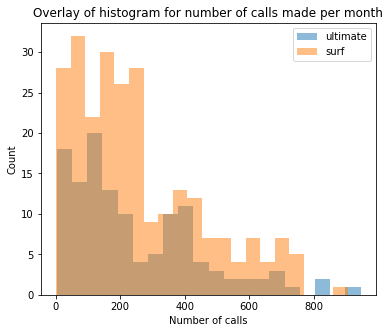

In [37]:
# histogram of number of calls per month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['number of calls'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['number of calls'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Number of calls', size=10)
plt.ylabel('Count', size=10)
plt.title('Overlay of histogram for number of calls made per month')
plt.legend(loc='upper right');

We first plotted an overlay of histogram to visually compare the distribution of number of calls per month across plans. From the overlay of histogram plot, we can see that the `surf` plan had the most representation for the number of calls per month. 

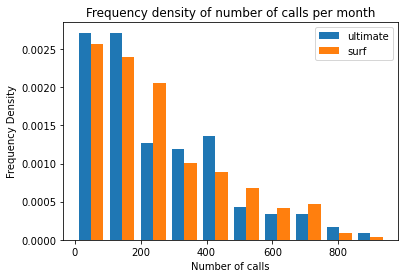

In [38]:
# density histogram showing frequency density of number of calls per month
plt.hist([ultimate_plan_filtered['number of calls'], surf_plan_filtered['number of calls']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Number of calls')
plt.title('Frequency density of number of calls per month');

We compare the frequency density distribution of number of calls for each user per month in order to compare values across groups. We did this by plotting a grouped density histogram where multiple distributions are plotted in a single plot. Looking at the plot, the `surf` plan had the most number of calls per month than the `ultimate` plan. With the frequency density plot, we can see the number of calls made per users across phone plan. We can see at a glance that the `surf` plan has more number of calls than the `ultimate` plan.

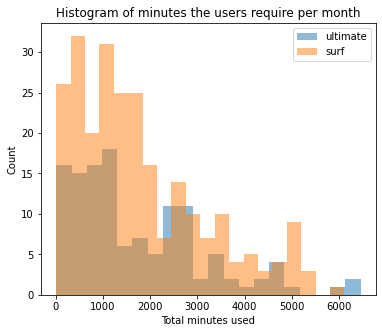

In [39]:
# histogram of minutes the users require each month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['total minutes used'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['total minutes used'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Total minutes used', size=10)
plt.ylabel('Count', size=10)
plt.title('Histogram of minutes the users require per month')
plt.legend(loc='upper right');

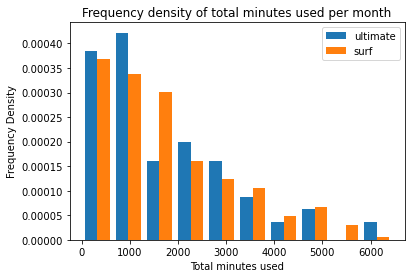

In [40]:
# density histogram showing frequency density of total minutes used per month
plt.hist([ultimate_plan_filtered['total minutes used'], surf_plan_filtered['total minutes used']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Total minutes used')
plt.title('Frequency density of total minutes used per month');

From the overlay of histogram plot, we can see that `surf` plan has the most users per month based on the total minutes used. The frequency density showing the total minutes used per month by each user shows that the distribution is skewed to the left. We can also see that the frequency density shows almost similar distribution. 

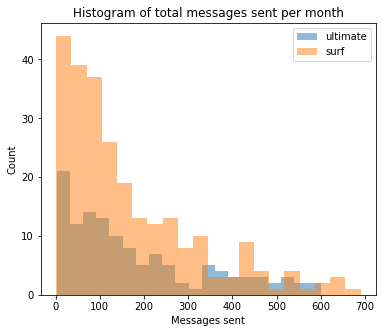

In [41]:
# histogram of messages sent each month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['messages sent'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['messages sent'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Messages sent', size=10)
plt.ylabel('Count', size=10)
plt.title('Histogram of total messages sent per month')
plt.legend(loc='upper right');

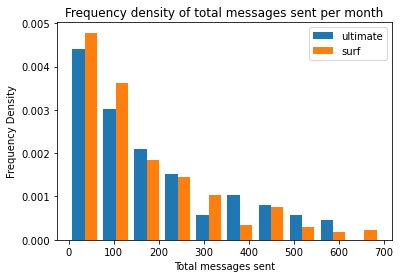

In [42]:
# density histogram showing frequency density of total messages sent each month
plt.hist([ultimate_plan_filtered['messages sent'], surf_plan_filtered['messages sent']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Total messages sent')
plt.title('Frequency density of total messages sent per month');

From the overlay of the histogram showing the distribution of total messages sent per month, we can see that `surf` plan had the most total messages sent per month. In the corresponding frequency density plot, we can see that both plans had similar trend. The `surf` plan had more users than the `ultimate` plan. 

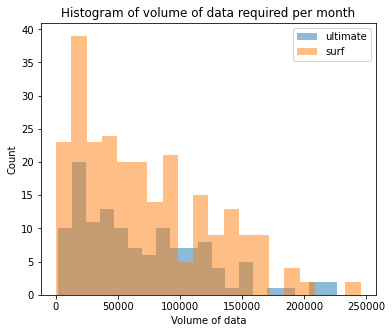

In [43]:
# histogram of volume of data required per month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['data volume'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['data volume'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Volume of data', size=10)
plt.ylabel('Count', size=10)
plt.title('Histogram of volume of data required per month')
plt.legend(loc='upper right');

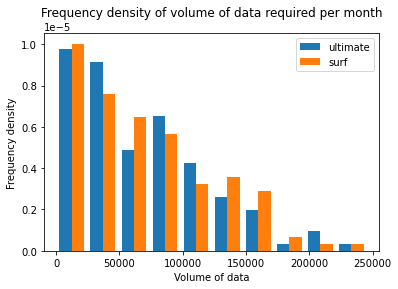

In [44]:
# density histogram showing frequency density of volume of data required per month
plt.hist([ultimate_plan_filtered['data volume'], surf_plan_filtered['data volume']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency density')
plt.xlabel('Volume of data')
plt.title('Frequency density of volume of data required per month', y=1.05);

The histogram of volume of data required per users per month across plans shows that the `surf` plan had more users based on volume of data required per month. In the corresponding frequency density plot, we can see that both plan have the same trend except that `surf` has more values for volume of data required per month. 

In [45]:
# average revenue for from users of ultimate and surf plan
ultimate_avg = ultimate_plan_filtered['revenue'].sum() / len(ultimate_plan_filtered['revenue'])
surf_avg = surf_plan_filtered['revenue'].sum() / len(surf_plan_filtered['revenue'])
diff = (surf_avg - ultimate_avg) / surf_avg * 100
print('The average revenue for users of the ultimate plan is ${:.2f}'.format(ultimate_avg))
print('The average revenue for users of the surf plan is ${:.2f}'.format(surf_avg))
print('Percentage difference between surf plan revenue and ultimate plan revenue is {:.2f}%'.format(diff))

The average revenue for users of the ultimate plan is $358.34
The average revenue for users of the surf plan is $617.16
Percentage difference between surf plan revenue and ultimate plan revenue is 41.94%


#### Conclusion

In this section, we calculated the statistics of our data. We determined that `ultimate` users on the average make 251 calls, use 1739 minutes per month, send about 182 messages, and use 68592 MB of data per month. We also computed statistics for `surf` users, and observed that on the average users make 256 calls, use 1791 minutes per month, send about 164 messages, and use 71250 MB of data per month. We plotted the distribution and the frequency density of the plans per user and observed that `surf` users have more representation overall than `ultimate` users. We also determined that `surf` brought in more revenue on the average since the average revenue for users in the `surf` plan is $\approx$ 42% greater than users in the `ultimate` plan.

<div id="test_hypothesis">
    <h2>Test the hypothesis</h2> 
</div>

#### Test 1

*Null Hypothesis*: There is *no difference* between the average revenue from users of Ultimate and Surf calling plans.

We calculated the average revenue for users of Ultimate calling plan as USD358.34, and the average revenue for the surf plan as USD617.16. We want to know whether the difference between these numbers are significant? That depends on the variance of the samples the values are calculated from. Instead of basing our comparison on the mean alone, we use the data to perform a statistical test. In this experiment, the *null hypothesis* is that there is *no difference* between the average revenue from users of Ultimate and Surf calling plan. The *alternative* hypothesis is that the average revenue from users of Ultimate and Surf calling plans differs. We can carry out hypothesis testing to test the hypothesis. We use a significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another. 

In [46]:
# hypothesis testing
ultimate = ultimate_plan_filtered['revenue']
surf = surf_plan_filtered['revenue']

# set critical statistical significance level
alpha = 0.05

# test the hypothesis that the means of the two independent population are equal
results = st.ttest_ind(ultimate, surf, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# compare the p-value with the significance level
if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 1.6048953607567302e-08
We reject the null hypohesis


#### Conclusion

We formulated the null hypothesis by stating that there is *no difference* between the average revenue from users of ultimate and surf calling plans. We used a significance level of 0.05. Since the p-value is less than 0.05, it means that the group are different hence **we reject the null hypothesis**. Our analysis suggest that average revenue from users of Ultimate and Surf calling plans differs. 

#### Test 2

*Null Hypothesis*: There is *no difference* between the average revenue from users in NY-NJ area and users from other regions.

*Alternative Hypothesis*: There is *a difference* between the average revenue from users in NY-NJ area and users from other regions. We carry out hypothesis testing to test the hypothesis. We use a significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

In [75]:
city_data = all_join[['user', 'city']]
new_data = pd.merge(data, city_data, on='user')
newyork_jersey = new_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users in NY-NJ
not_newyork_jersey = new_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users not in NY-NJ
print('The average revenue of users in New York-New Jersey area is ${:.2f}'.format(newyork_jersey.mean()))
print('The average revenue of users from other regions is ${:.2f}'.format(not_newyork_jersey.mean()))

The average revenue of users in New York-New Jersey area is $592.04
The average revenue of users from other regions is $578.04


We have determined the average revenue of users in New York-New Jersey area as USD592.04, and the average revenue of users from other regions as USD578.04. We want to know whether the difference between these number is significant? We set up a hypothesis test for significance using a significance level (or $\alpha$ values) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. We use a t-test to test the hypothesis since it can be used to compare the means of two groups in order to determine whether the two groups are different from one another. The set is shown in the code below.

In [96]:
# hypothesis testing
newyork_jersey = new_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users in NY-NJ
not_newyork_jersey = new_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users not in NY-NJ

# set critical statistical significance level
alpha = 0.05

# test the hypothesis that the means of the two independent population are equal
results = st.ttest_ind(newyork_jersey, not_newyork_jersey, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# compare the p-value with the significance level
if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 0.8570018583359007
We fail to reject the null hypothesis


#### Conclusion

We formulated our null hypothesis by stating that there is *no difference* between the average revenue from users in New York-New Jersey area, and users from other region. We used a t-test to test the hypothesis using a significance level of 0.05. Since the p-value is not less than 0.05, then the groups are not different hence **we fail to reject the null hypothesis**. We may not know the size of the difference between the average revenue from users in New York-New Jersey area, and users from other regions. All the test tells us is that they are different. However, by calculating the average number for revenue from users in both groups, we can say with certainty that the mean of the revenue between the two groups are not significantly different. 

<div id="overall_conclusion">
    <h2>Overall conclusion</h2> 
</div>

By looking at the general information of the data, we identified some errors like problem with the datatype and corrected them by converting datatype to the right format. We made calculation and determined that 481 users made calls, 189 messages were sent per user per month, 78,601 MB of data was used on the average per month. We analyzed the data by carrying out exploratory data analysis and found that the distribution of the data is **skewed to the right**. We detected and removed outliers from the data, and used the filtered data to compute the statistics.  

We determined that `ultimate` users on the average make 251 calls, use 1739 minutes per month, send about 182 messages, and use 68592 MB of data per month. We also computed statistics for `surf` users, and observed that on the average users make 256 calls, use 1791 minutes per month, send about 164 messages, and use 71250 MB of data per month. We plotted the distribution and the frequency density of the plans per user and observed that `surf` users have more representation overall than `ultimate` users. We also determined that `surf` brought in more revenue on the average since the average revenue for users in the `surf` plan is $\approx$ 42% greater than users in the `ultimate` plan. The calculated average revenue for users of `ultimate` calling plan is USD358.34, while the average revenue for the `surf` plan as USD617.16.

We formulated the null hypothesis by stating that there is *no difference* between the average revenue from users of `ultimate` and `surf` calling plans. We used a significance level of 0.05 to calculate the p-value. From the hypothesis test, we determined that the group are different hence we reject the null hypothesis. The test suggested that average revenue from users of Ultimate and Surf calling plans differs. We also tested the hypothesis by stating that there is *no difference* between the average revenue from users in New York-New Jersey area, and users from other region. Our hypothesis test shows that the average revenue from users in New York-New Jersey area, and users from other region are not different.

We can conclude from this analysis that:
- users on the `surf` plan on the average make more calls, use more minutes per month, send less messages, and use more internet data than users on the `ultimate` plan.
- users on the `surf` plan brings in more average revenue than users on the `ultimate` plan
- the average revenue from users in the New York-New Jersey area is a little bit greater than revenue from users in other regions 
- the commercial department should adjust advertising budget and advertise more calls and internet data offers to the user in the `surf` plan, and more messaging offers to users in the `ultimate` plan
- the commercial department should invest in more advertisements in the New York-New Jersey area since Megaline makes more money in that area than any other region.
- the `surf` plan is more profitable than the `ultimate` plan.

We could carry out further analysis to determine the average revenue by age group. That will also inform Megaline telecom on which age group and advertising medium to target for marketing purposes. For instance, if we analyze that people in the age group 0 - 25 brings in more revenue, we can also determine whether marketing on social media apps like TikTok or Instagram will bring in more users and revenue than TV or billboard advertisement. 